In [23]:
from numpy import sqrt, empty, concatenate, dot
from pylab import scatter,plot, show

In [3]:
G=1.
m0=150
m1=200
m2=250
h=1e-3
delta=1e-3
tmax=10.
R=0.001
C=.1
hmax=1e-3

In [4]:
def magsq(v):
    return(dot(v,v))


In [5]:
def f(rv):
    r0=rv[0:2]
    r1=rv[2:4]
    r2=rv[4:6]
    v0=rv[6:8]
    v1=rv[8:10]
    v2=rv[10:12]
    
    dr01 =magsq(r0-r1)**1.5
    dr12=magsq(r1-r2)**1.5
    dr20=magsq(r2-r0)**1.5
    
    fv0=G*(m1*(r1-r0)/dr01+m2*(r2-r0)/dr20)
    fv1=G*(m0*(r0-r1)/dr01+m2*(r2-r1)/dr12)
    fv2=G*(m0*(r0-r2)/dr20+m1*(r1-r2)/dr12)
    
    return concatenate([v0,v1,v2,fv0,fv1,fv2])

    

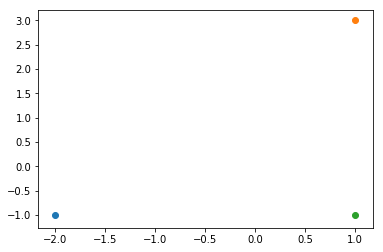

In [18]:
rv=empty(12,float)
rv[0:2]=[1.,3.]
rv[2:4]=[-2.0,-1.]
rv[4:6]=[1.,-1.]

rv[6:12]=0.0
scatter(rv[2],rv[3])
scatter(rv[0],rv[1])
scatter(rv[4],rv[5])
show()

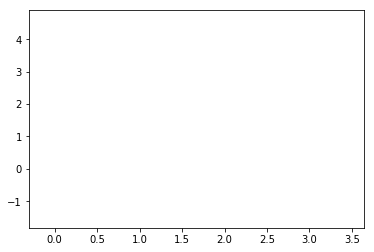

In [24]:
rv=empty(12,float)
rv[0:2]=[1.,3.]
rv[2:4]=[-2.0,-1.]
rv[4:6]=[1.,-1.]

rv[6:12]=0.0
t=0.0
counter=0
while t<tmax:
    k1=h*f(rv)
    k2=h*f(rv+0.5*k1)
    k3=h*f(rv+0.5*k2)
    k4=h*f(rv+k3)
    rv1=rv+(k1+2*k2+2*k3+k4)/6
    
    k1=h*f(rv1)
    k2=h*f(rv1+0.5*k1)
    k3=h*f(rv1+0.5*k2)
    k4=h*f(rv1+k3)
    rv1=rv1+(k1+2*k2+2*k3+k4)/6
    
    k1=2*h*f(rv)
    k2=2*h*f(rv+0.5*k1)
    k3=2*h*f(rv+0.5*k2)
    k4=2*h*f(rv+k3)
    rv2=rv+(k1+2*k2+2*k3+k4)/6
    
    e0=sqrt(magsq(rv1[0:2]-rv2[0:2]))/30
    e1=sqrt(magsq(rv1[2:4]-rv2[2:4]))/30
    e2=sqrt(magsq(rv1[4:6]-rv2[4:6]))/30
    epsilon=max(e0,e1,e2)
    rho=delta*h/epsilon
    if rho>=1.0:
        rv=rv1
        t+=2*h
        h=min(h*rho**0.25, 2*h, hmax)
        if counter%10==0:
            
            plot(rv[0],rv[1])
            #scatter(rv[2],rv[3])
            #scatter(rv[4],rv[5])
        counter=counter+1
    else:
        h=h*rho**0.25
        
show()

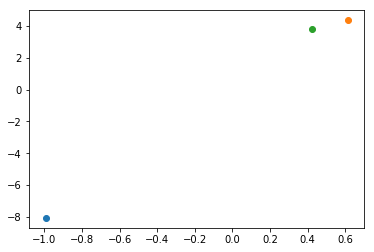

In [20]:
scatter(rv[2],rv[3])
scatter(rv[0],rv[1])
scatter(rv[4],rv[5])
show()